In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#import dataframe and visualize

path = 'normalized.pickle'
df = pd.read_pickle(os.path.join(r'C:\Users\Teresa\Desktop\TESE\Textural Analysis', path))

df

,Area,Image,Mean Green,Mean Intensity,Mean Red,Normalized Mean Green,Normalized Mean Red,Normalized Total Green,Normalized Total Red,Nucleus Patch,...,Equivalent Diameter,Major Axis Length,Minor Axis Length,Max Intensity,Min Intensity,Orientation,Perimeter,Solidity,Entropy,Circularity
0,4155,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,12.619976,125.657280,46.411793,0.262386,0.964963,0.262386,0.964963,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,72.734519,93.715394,56.642633,255,44,0.884948,248.350288,0.983199,5.579251,0.846548
3,4760,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,29.452311,120.828992,37.138025,0.621369,0.783518,0.621369,0.783518,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,77.849985,93.066080,65.323570,255,40,1.412099,258.894444,0.992287,6.150013,0.892424
4,5014,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,6.779418,114.041284,86.455325,0.078175,0.996940,0.078175,0.996940,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,79.900082,88.914160,72.074866,255,46,-1.500195,261.722871,0.990518,5.924569,0.919837
6,5503,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,10.632564,106.558968,73.093949,0.143949,0.989585,0.143949,0.989585,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,83.705658,89.324967,78.566344,255,39,-0.744969,271.764502,0.993142,5.826534,0.936319
7,5800,All_FS2_1_40xoil_60Zs_deconv_10_Mask.tif.png.png,7.822759,116.757931,120.578621,0.064741,0.997902,0.064741,0.997902,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,85.934797,88.987739,83.083881,255,48,-1.071380,279.764502,0.992131,5.580421,0.931221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,5145,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,77.881633,152.714480,4.357629,0.998438,0.055865,0.998438,0.055865,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,80.937120,91.817259,71.901276,255,46,-1.451276,273.764502,0.985632,5.352308,0.862663
8614,4802,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,52.264681,136.686381,2.954602,0.998406,0.056441,0.998406,0.056441,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,78.192687,84.966272,71.992936,255,57,0.596904,258.107648,0.986239,5.435626,0.905796
8615,3566,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,17.987942,127.823331,39.335109,0.415878,0.909420,0.415878,0.909420,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,67.382284,77.833736,58.528837,255,52,-1.448471,228.409163,0.978864,5.656561,0.858943
8617,4908,All_Id_FS6_3_40xoil_60Zs_deconv_9_Mask.tif.png...,51.481866,152.560921,7.560106,0.989389,0.145292,0.989389,0.145292,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,79.050994,79.792635,78.405947,255,59,-1.557158,261.622366,0.985542,6.055117,0.901083


In [42]:
#feature space for the k-means
matrix = df.as_matrix(columns = ['Normalized Mean Red', 'Normalized Mean Green'])


X = matrix.astype(float).reshape(matrix.shape)

#obtain 2 clusters
kmeans = KMeans(n_clusters=2, n_init = 100, verbose = 0, tol = 1e-10, precompute_distances = True).fit(X)
  
aux = kmeans.labels_  # obtain the k-means predictions 


C:\Users\Teresa\Anaconda2\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [43]:
#comparing results

kmean = pd.DataFrame(aux)
label = pd.DataFrame(df.loc[:,'Automatic Label'])

#concat two dataframes for better visualization 
compare = pd.concat([kmean,label],axis=1)
compare.columns = ['KMeansLabel','AutomaticLabel']  #naming the dataframe columns

#compare
compare['KMeansLabel'].equals(compare['AutomaticLabel'])

False

In [44]:
def threeD_plot(names, df, aux):


    import pandas as pd
    from pandas import DataFrame
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    #subset = df[df.Image.str.startswith(names)]

    subset = df

    color_lst = build_color_array(aux)

    threedee = plt.figure().gca(projection='3d')
    threedee.scatter(subset['Total Red'], subset['Total Green'], c = color_lst)
    threedee.set_xlabel('Total Red')
    threedee.set_ylabel('Total Green')
    threedee.set_zlabel('Total Blue')
    plt.show()

    return color_lst

In [45]:
def build_color_array(aux):
    color_list = []
    for r in aux:
        #color_list.append([np.around(r/255.0, decimals = 1), np.around(g/255.0, decimals = 1), 0.0])
        if(r==0):  
            color_list.append([1, 0, 0])
        elif(r==1):
            color_list.append([0, 1, 0])
        else:
            color_list.append([0, 0, 1])
       
    
    final_color_list = np.asarray(color_list)
    
    return final_color_list



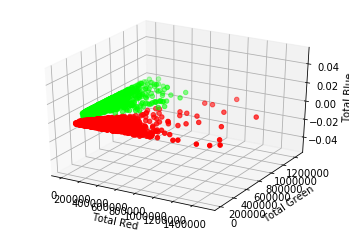

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [46]:
threeD_plot(['All'], df, aux)

In [47]:
def normalized_red_green_plt_aux(names, df, total , aux):

    # (r, g) plot with normalized colors for each point
    
    color = ['k', 'g', 'y']
    fig, ax = plt.subplots()
    for i, name in enumerate(names):    
        
        subset = df[df.Image.str.startswith(name)]


        if total:
            x = subset["Total Red"].values
            y = subset["Total Green"].values

            red = subset["Normalized Total Red"].values
            green = subset["Normalized Total Green"].values


        else:    
            x = subset["Mean Red"].values
            y = subset["Mean Green"].values


            red = subset["Normalized Mean Red"].values
            green = subset["Normalized Mean Green"].values
# =============================================================================
#         x_aux = subset["Mean Red"].values
#         y_aux = subset["Mean Green"].values
#         
#         x = x_aux / (x_aux + y_aux)
#         y = y_aux / (x_aux + y_aux)
# =============================================================================	
        color_lst = build_color_array(aux)

        #xi = np.linspace(np.min(x), np.max(x), 500)
        #yi = np.interp(xi, x, y, yp)
        #ax.plot(x, y, 'g'+'o', xi, yi, 'm'+'-')
        ax.scatter(x, y, c = color_lst)

        ax.set_title(name)
        ax.set_xlabel('Mean Red')
        ax.set_ylabel('Mean Green')

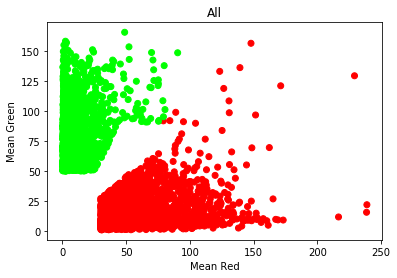

In [49]:
normalized_red_green_plt_aux(['All'], df, False, aux)

In [50]:
def area_intensity_plt_colored(names, df, aux):
	

	# (A, TI) plot with non-normalized colors for each point

	fig, ax = plt.subplots()
	for i, name in enumerate(names):    
		
		subset = df[df.Image.str.startswith(name)]
		
		
		x = subset["norm_area"].values
		y = subset["norm_intensity"].values

		
		color_lst = build_color_array(aux)
		
		#xi = np.linspace(np.min(x), np.max(x), 500)
		#yi = np.interp(xi, x, y, yp)
		#ax.plot(x, y, 'g'+'o', xi, yi, 'm'+'-')
		#ax.plot(x, y, c = color_lst)
		
		ax.scatter(x, y, c = color_lst)

		ax.set_title(name)
		ax.set_xlabel('Total Area')
		ax.set_ylabel('Total Intensity')

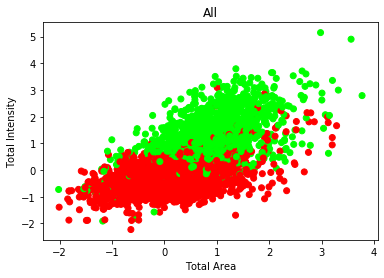

In [51]:
area_intensity_plt_colored(['All'], df, aux)

In [52]:
def area_intensity_plt_colored1(names, df, total):
	

	# (A, TI) plot with non-normalized colors for each point

	fig, ax = plt.subplots()
	for i, name in enumerate(names):    
		
		subset = df[df.Image.str.startswith(name)]
		
		
		x = subset["norm_area"].values
		y = subset["norm_intensity"].values
		

		if total:

			red = subset["Total Red"].values
			green = subset["Total Green"].values

		else:

			red = subset["Normalized Mean Red"].values
			green = subset["Normalized Mean Green"].values
		
		color_lst = build_color_array1(red * 255 , green * 255)
		
		#xi = np.linspace(np.min(x), np.max(x), 500)
		#yi = np.interp(xi, x, y, yp)
		#ax.plot(x, y, 'g'+'o', xi, yi, 'm'+'-')
		#ax.plot(x, y, c = color_lst)
		
		
		
		ax.scatter(x, y, c = color_lst)

		ax.set_title(name)
		ax.set_xlabel('Total Area')
		ax.set_ylabel('Total Intensity')





In [53]:
def build_color_array1(red, green):
	color_list = []
	for r, g in zip(red, green):
		#color_list.append([np.around(r/255.0, decimals = 1), np.around(g/255.0, decimals = 1), 0.0])
		color_list.append([r/255.0, g/255.0, 0.0])
	
	final_color_list = np.asarray(color_list)
	
	return final_color_list




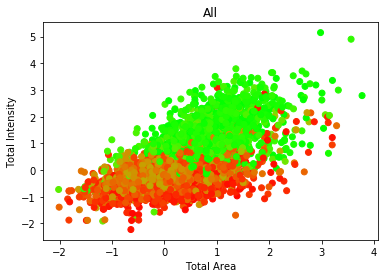

In [54]:
area_intensity_plt_colored1(['All'], df, False)